<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [ ]:
#@title Current Date
Today = '2021-10-05' #@param {type:"date"}


In [ ]:
#@markdown ---
#@markdown ### Enter your details here:
Team_Number = "" #@param {type:"string"}
Student_ID&Name = "20197772_BarryLawton" #@param {type:"string"}
Student_ID&Name = "20197772_BarryLawton" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
#@markdown ---

In [ ]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = Draft #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

# INTRODUCTION

Your introduction here.

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [2]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [5]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [6]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

In [7]:
!pip install gpy

     |████████████████████████████████| 959 kB 28.5 MB/s 
     |████████████████████████████████| 71 kB 8.8 MB/s 
  Created wheel for gpy: filename=GPy-1.10.0-cp37-cp37m-linux_x86_64.whl size=2565088 sha256=ef0c2273247ae671fe5ebb880d2cc19c37e471f8b431791cf494aa963b8b9a8b
  Stored in directory: /root/.cache/pip/wheels/f7/18/28/dd1ce0192a81b71a3b086fd952511d088b21e8359ea496860a
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102565 sha256=00dcaec982aa45d689c57da2974a493a6a9e5e18904652ab02abe056f1b85e2c
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built gpy paramz


In [8]:
import seaborn as sns
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az

In [9]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:

Path = '/content/drive/My Drive/Data/ET5003_Etivity_3/'

In [11]:
train_data = Path + 'HousePrice_Train.csv'
test_data = Path + 'HousePrice_Test.csv'

# We don't need the sample submission, this needs to be created/predicted, keeping it for reference
#sample_submission = Path + 'sample_submission.csv'

In [12]:
# train data
df_train = pd.read_csv(train_data)
print("Training dataset shape : ",df_train.shape)

# test data
df_test = pd.read_csv(test_data)
print("Test dataset shape : ",df_test.shape)

# sample submission example
# df_sample = pd.read_csv(sample_submission)
# print("Sample_Submission dataset shape : ",df_sample.shape) 

Training dataset shape :  (1638, 14)
Test dataset shape :  (702, 13)


In [13]:
df_train.isna().sum()


Index               0
ID                  0
Location            0
Num_Bathrooms       0
Num_Beds            0
BER_class         251
Description         0
Services         1061
Features            0
Latitude            0
Longitude           0
Type                0
Surface             0
Price               0
dtype: int64

In [14]:
df_test.isna().sum()

Index              0
ID                 0
Location           0
Num_Bathrooms      0
Num_Beds           0
BER_class        108
Description        0
Services         456
Features           0
Latitude           0
Longitude          0
Type               0
Surface            0
dtype: int64

In [16]:
df_train.head(6)

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
0,1,12409116,Ongar,2,2,C3,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,apartment,67.00,195000
1,2,12320330,North Strand,1,2,D1,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,terraced,95.97,425000
2,3,12405953,Stepaside,3,3,A3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,semi-detached,107.00,535000
3,4,12202582,Cabinteely,1,3,E1,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,detached,81.00,499000
4,5,12299336,Lusk,3,4,D1,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,detached,153.00,510000
5,6,12225979,Glasnevin,1,3,E1,Property Team Lappin Estates take great pleasu...,NaN,None,53.380367,-6.279310,terraced,140.00,360000


In [ ]:
df_train.describe()

,Index,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface,Price
count,1638.000000,1.638000e+03,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1.638000e+03
mean,819.500000,1.231930e+07,2.054335,3.043346,53.350473,-6.255086,169.540695,5.547196e+05
std,472.994186,1.447540e+05,1.241259,1.379650,0.076832,0.144430,1791.793934,5.652032e+05
min,1.000000,1.118567e+07,1.000000,1.000000,52.501856,-6.497000,3.400000,1.999500e+04
25%,410.250000,1.228104e+07,1.000000,2.000000,53.294261,-6.309613,73.000000,2.950000e+05
50%,819.500000,1.238055e+07,2.000000,3.000000,53.341386,-6.247780,97.050000,3.950000e+05
75%,1228.750000,1.240548e+07,3.000000,4.000000,53.382031,-6.193982,135.000000,5.950000e+05
max,1638.000000,1.242836e+07,18.000000,27.000000,53.630588,-1.744995,72236.387140,8.900000e+06


In [ ]:
df_test.describe()

,Index,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface
count,702.000000,7.020000e+02,702.000000,702.000000,702.000000,702.000000,702.000000
mean,1989.500000,1.231545e+07,2.027066,2.987179,53.350445,-6.252411,132.603530
std,202.794231,1.420680e+05,1.071273,1.198480,0.073961,0.091600,330.347066
min,1639.000000,1.147889e+07,1.000000,1.000000,53.214227,-6.521183,32.100000
25%,1814.250000,1.227637e+07,1.000000,2.000000,53.295225,-6.304258,73.000000
50%,1989.500000,1.237928e+07,2.000000,3.000000,53.341153,-6.247799,99.200000
75%,2164.750000,1.240421e+07,3.000000,4.000000,53.381752,-6.184277,136.875000
max,2340.000000,1.242824e+07,9.000000,14.000000,53.617443,-6.057150,8576.000000


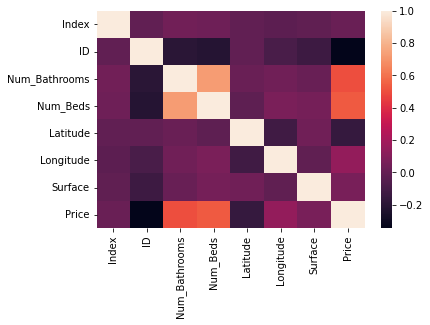

In [ ]:
sns.heatmap(df_train.corr())
plt.show()

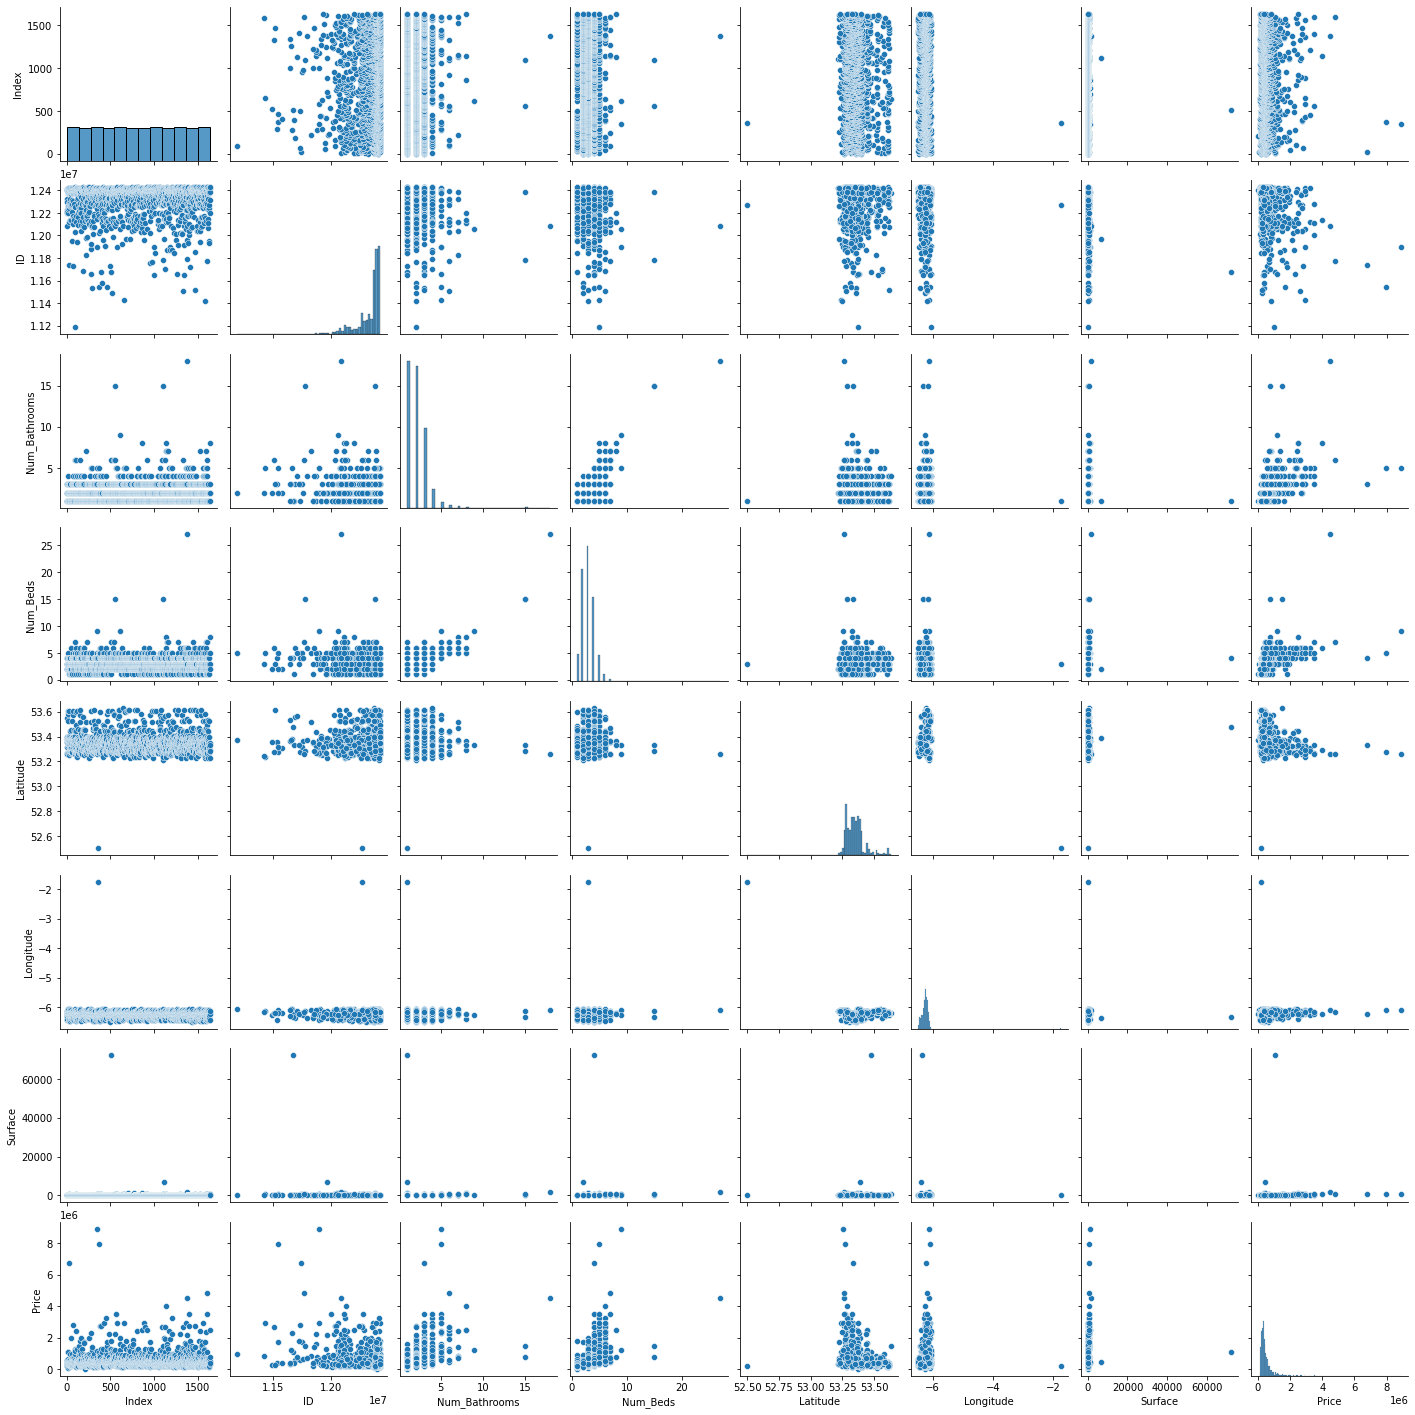

In [ ]:
sns.pairplot(df_train)
plt.show()
# sns.pairplot(df_test)
# plt.show()

In [ ]:
df_train.dtypes

Index              int64
ID                 int64
Location          object
Num_Bathrooms      int64
Num_Beds           int64
BER_class         object
Description       object
Services          object
Features          object
Latitude         float64
Longitude        float64
Type              object
Surface          float64
Price              int64
dtype: object

In [ ]:
columns = list(df_train.select_dtypes(exclude =object).columns)
#columns

In [ ]:
num_columns = ['Num_Bathrooms','Num_Beds','Surface']

num_columns

['Num_Bathrooms', 'Num_Beds', 'Surface']

In [ ]:
# Removing outliers
def remove_outliers(df_train, num_columns, threshold = 1.5):
 
  for i,col in enumerate(num_columns):
     
     q1 = df_train[col].quantile(0.25)
     q3 = df_train[col].quantile(0.75)
     iqr = q3 - q1     
     df_no_outlier = df_train[(df_train[col] > q1 - threshold*iqr ) & (df_train[col] < q3 + threshold*iqr)]
  return df_no_outlier

In [ ]:
df_train = remove_outliers(df_train,num_columns)

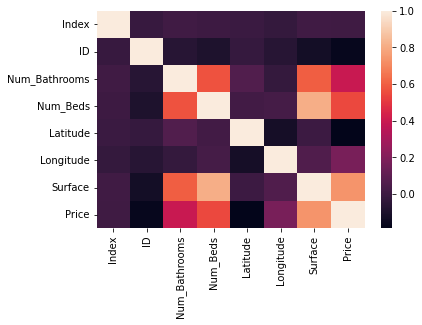

In [ ]:
sns.heatmap(df_train.corr())
plt.show()

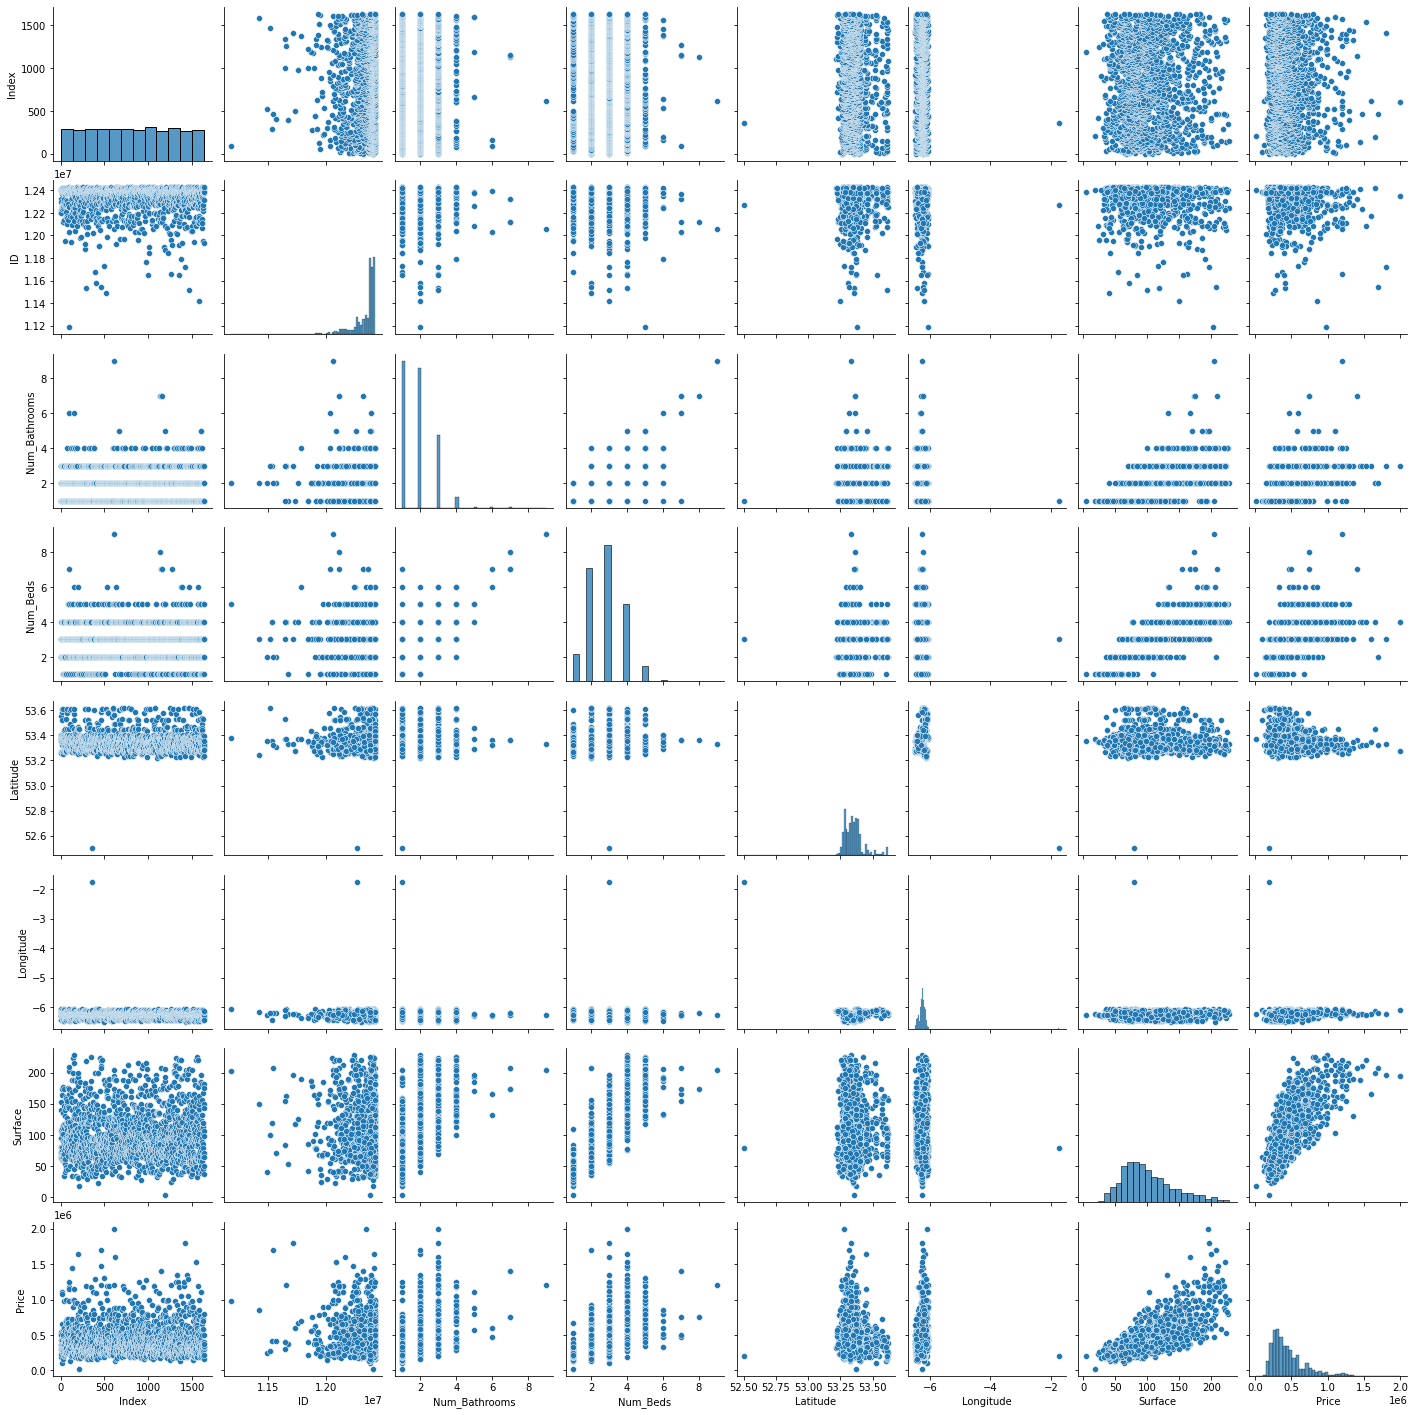

In [ ]:
sns.pairplot(df_train)
plt.show()


In [ ]:
df_train[(df_train['Latitude']<53) | (df_train['Longitude']>-4)]

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
355,356,12270559,Clondalkin,1,3,NaN,RAY COOKE AUCTIONEERS take great pleasure in i...,NaN,None,52.501856,-1.744995,semi-detached,79.0,199000


Based on the  co-ordinates this is an address in Birmingham,UK, so I will drop this example

In [ ]:
df_train.drop(index=355,axis=1,inplace=True)


## Cathegorical variables

In [ ]:
ber_mapper = {
    'A1':1,'A2':2,'A3':3,
    'B1':4,'B2':5,'B3':6,
    'C1':7,'C2':8,'C3':9,
    'D1':10,'D2':11,
    'E1':12,'E2':13,
    'F':14,
    'G':15,
    'SINo666of2006exempt':16
}

df_train['BER_class'] = df_train['BER_class'].replace(ber_mapper)
#df_test_clean['ber_classification'] = df_test['ber_classification'].replace(ber_mapper)

In [ ]:
df_train.isna().sum()

Index              0
ID                 0
Location           0
Num_Bathrooms      0
Num_Beds           0
BER_class        221
Description        0
Services         966
Features           0
Latitude           0
Longitude          0
Type               0
Surface            0
Price              0
dtype: int64

In [ ]:
df_train = pd.get_dummies(df_train, columns=['Type'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Type'], drop_first=True)

In [ ]:
df_train.columns

Index(['Index', 'ID', 'Location', 'Num_Bathrooms', 'Num_Beds', 'BER_class',
       'Description', 'Services', 'Features', 'Latitude', 'Longitude',
       'Surface', 'Price', 'Type_bungalow', 'Type_detached', 'Type_duplex',
       'Type_end-of-terrace', 'Type_semi-detached', 'Type_site', 'Type_studio',
       'Type_terraced', 'Type_townhouse'],
      dtype='object')

In [ ]:
df_train.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Surface,Price,Type_bungalow,Type_detached,Type_duplex,Type_end-of-terrace,Type_semi-detached,Type_site,Type_studio,Type_terraced,Type_townhouse
0,1,12409116,Ongar,2,2,9.0,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,67.00,195000,0,0,0,0,0,0,0,0,0
1,2,12320330,North Strand,1,2,10.0,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,95.97,425000,0,0,0,0,0,0,0,1,0
2,3,12405953,Stepaside,3,3,3.0,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,107.00,535000,0,0,0,0,1,0,0,0,0
3,4,12202582,Cabinteely,1,3,12.0,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,81.00,499000,0,1,0,0,0,0,0,0,0
4,5,12299336,Lusk,3,4,10.0,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,153.00,510000,0,1,0,0,0,0,0,0,0


## Training & Test Data

In [ ]:
# split data into training and test
from sklearn.model_selection import train_test_split

# training: 70% (0.7), test: 30% (0.3) 
# you could try any other combination 
# but consider 50% of training as the low boundary
X_train,X_test,y_train,y_test = train_test_split(df_train.drop('Price',axis=1), df_train['Price'], test_size=0.3)

### Train dataset

In [ ]:
# training dataset: 
training_file = syntPath+filename1
# test dataset: 
testing_file = syntPath+filename2
# cost dataset: 
cost_file = syntPath+filename3

In [ ]:
# show first data frame rows 
dftrain.head()

In [ ]:
# Generate descriptive statistics
dftrain.describe()

### Test dataset

In [ ]:
# show first data frame rows 
dftest.head()

In [ ]:
# Generate descriptive statistics
dftest.describe()

### Expected Cost dataset

In [ ]:
# Generate descriptive statistics
dfcost.describe()

# NATURAL LANGUAGE PROCESSING

Natural language processing ([NLP](https://en.wikipedia.org/wiki/Natural_language_processing)) is a subfield of linguistics, computer science, and artificial intelligence.

* NLP concerned with the interactions between computers and human language.
* In particular how to program computers to process and analyze large amounts of natural language data. 
* The goal is a computer capable of "understanding" the contents of documents.
* Including the contextual nuances of the language within them. 
* The technology can then accurately extract information and insights contained in the documents.
* As well as categorize and organize the documents themselves. 

Your comments, explanation, and references here.

In [ ]:
df_train_text = df_train.drop(['Index', 'ID', 'Location', 'Num_Bathrooms', 'Num_Beds', 'BER_class',
       'Latitude', 'Longitude','Surface', 'Price', 'Type_bungalow', 'Type_detached', 'Type_duplex',
       'Type_end-of-terrace', 'Type_semi-detached', 'Type_site', 'Type_studio',
       'Type_terraced', 'Type_townhouse'],axis = 'columns')
df_train_text

In [ ]:
df_test_text = df_train.drop(['Index', 'ID', 'Location', 'Num_Bathrooms', 'Num_Beds', 'BER_class',
       'Latitude', 'Longitude','Surface','Type_bungalow', 'Type_detached', 'Type_duplex',
       'Type_end-of-terrace', 'Type_semi-detached', 'Type_site', 'Type_studio',
       'Type_terraced', 'Type_townhouse'],axis = 'columns')
df_test_text

In [ ]:
# your code here

# PIECEWISE REGRESSION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

Your comments, explanation, and references here.

In [ ]:
# your code here

# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

Your comments, explanation, and references here.

In [ ]:
# your code here

# SUMMARY

Your summary here.